In [70]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm.auto import tqdm
import useful_rdkit_utils as uru

In [5]:
tqdm.pandas()

In [76]:
def get_reaction_component_smarts(smarts):
    reactants, products = smarts.split(">>")
    smarts_list = reactants.split(".")
    return smarts_list

def add_molecule_names(df):
    [x.SetProp("_Name",str(y)) for x,y in df[["mol","Name"]].values]

In [33]:
df = pd.read_csv("ZINC_lt_250.csv")

In [34]:
df['mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/855655 [00:00<?, ?it/s]

[16:59:14] Explicit valence for atom # 1 Sn, 5, is greater than permitted
Exception ignored in: <function tqdm.__del__ at 0x3488def20>
Traceback (most recent call last):
  File "/Users/pwalters/miniforge3/envs/rdkit_2025_01/lib/python3.11/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/Users/pwalters/miniforge3/envs/rdkit_2025_01/lib/python3.11/site-packages/tqdm/notebook.py", line 282, in close
    self.disp(bar_style='success', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm' object has no attribute 'disp'
[16:59:30] Explicit valence for atom # 2 Sn, 5, is greater than permitted
[16:59:36] Explicit valence for atom # 3 Sn, 5, is greater than permitted


In [145]:
df.dropna(subset="mol",inplace=True)

In [156]:
rxn_df = pd.read_excel("/Users/pwalters/DATA/REACTIONS/reactions.xlsx")

In [157]:
len(rxn_df)

26

In [158]:
df_list = []
for i in range(23,26):
    rs = rxn_df.SMARTS.values[i]
    for j,comp in enumerate(get_reaction_component_smarts(rs)):
        pat = Chem.MolFromSmarts(comp)
        df['match'] = [x.HasSubstructMatch(pat) for x in tqdm(df.mol.values)]
        match_df = df.query("match")
        print(i,j,len(match_df))
        num_to_sample = min(len(match_df),1000)
        df_list.append(match_df.sample(num_to_sample).copy())

  0%|          | 0/855652 [00:00<?, ?it/s]

23 0 248800


  0%|          | 0/855652 [00:00<?, ?it/s]

23 1 95874


  0%|          | 0/855652 [00:00<?, ?it/s]

23 2 17390


  0%|          | 0/855652 [00:00<?, ?it/s]

23 3 7349


  0%|          | 0/855652 [00:00<?, ?it/s]

24 0 248800


  0%|          | 0/855652 [00:00<?, ?it/s]

24 1 95874


  0%|          | 0/855652 [00:00<?, ?it/s]

24 2 4771


  0%|          | 0/855652 [00:00<?, ?it/s]

24 3 718


  0%|          | 0/855652 [00:00<?, ?it/s]

25 0 248800


  0%|          | 0/855652 [00:00<?, ?it/s]

25 1 95874


  0%|          | 0/855652 [00:00<?, ?it/s]

25 2 4771


  0%|          | 0/855652 [00:00<?, ?it/s]

25 3 17797


In [149]:
ok = True
for smarts in rxn_df.SMARTS:
    smarts_list = get_reaction_component_smarts(smarts)
    for s in smarts_list:
        pat = Chem.MolFromSmarts(s)
        if pat is None:
            ok = False
            break
    print(ok)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


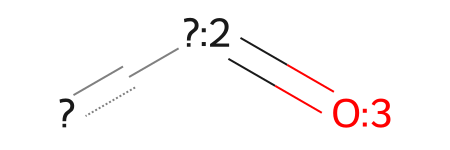

In [140]:
Chem.MolFromSmarts('[C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl]')

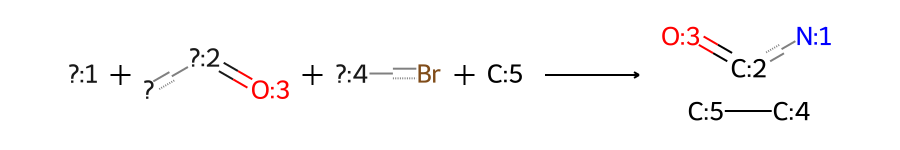

In [144]:
ugi_smarts = "[N;D1$(N-[#6]),D2$(N(-[#6])-[#6]);$(N-[#6])!$(N-C=[O,N,S]):1].[C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl].[#6;aD3$([#6]([#6])[#6]),AD2$([#6][#6]):4][#35;A;D1].[#6;A;D1;$(C#C[#6,#14]):5]>>([N:1][C:2](=[O:3]).[#6:5]-[#6:4])"
AllChem.ReactionFromSmarts(ugi_smarts)

In [130]:
for sma in get_reaction_component_smarts(ugi_smarts):
    print(sma)
    Chem.MolFromSmarts(sma)

[N;D1$(N-[#6]),D2$(N(-[#6])-[#6]);$(N-[#6])!$(N-C=[O,N,S]):1]
([C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl]
[#6;aD3$([#6]([#6])[#6]),AD2$([#6][#6]):4][#35;A;D1])
[#6;A;D1;$(C#C[#6,#14]):5]


[19:41:38] SMARTS Parse Error: syntax error while parsing: ([C;D2,$(C[#6])_100:2](=[OD1:3])[OD1,Cl]
[19:41:38] SMARTS Parse Error: Failed parsing SMARTS '([C;D2,$(C[#6])_100:2](=[OD1:3])[OD1,Cl]' for input: '([C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl]'
[19:41:38] SMARTS Parse Error: syntax error while parsing: [#6;aD3$([#6]([#6])[#6]),AD2$([#6][#6]):4][#35;A;D1])
[19:41:38] SMARTS Parse Error: Failed parsing SMARTS '[#6;aD3$([#6]([#6])[#6]),AD2$([#6][#6]):4][#35;A;D1])' for input: '[#6;aD3$([#6]([#6])[#6]),AD2$([#6][#6]):4][#35;A;D1])'


In [131]:
Chem.MolFromSmarts("([C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl])")

[19:43:32] SMARTS Parse Error: syntax error while parsing: ([C;D2,$(C[#6])_100:2](=[OD1:3])[OD1,Cl])
[19:43:32] SMARTS Parse Error: Failed parsing SMARTS '([C;D2,$(C[#6])_100:2](=[OD1:3])[OD1,Cl])' for input: '([C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl])'


In [88]:
rxn = AllChem.ReactionFromSmarts(rxn_df.SMARTS.values[0])
[add_molecule_names(x) for x in df_list]
prod_list = uru.enumerate_library(rxn,[df_list[0].mol,df_list[1].mol])

In [89]:
len(prod_list)

1000000

In [90]:
prod_df = pd.DataFrame(prod_list,columns=["SMILES","Name"])

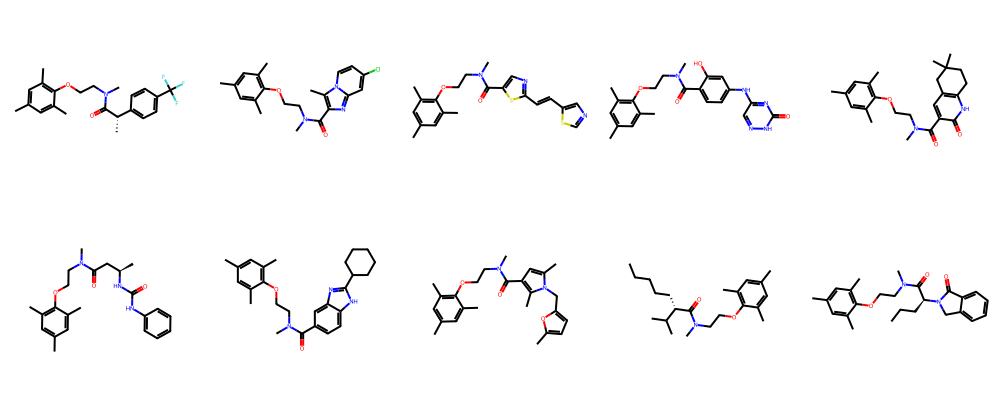

In [95]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in prod_df.SMILES.values[:10]],molsPerRow=5)

In [154]:
x = "[N;D1$(N-[#6]),D2$(N(-[#6])-[#6]);$(N-[#6])!$(N-C=[O,N,S]):1].([C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl].[N;D2;$(N(-[#6])-[#6]):4]C(=[OD1])[OD2]C([CD1])([CD1])[CD1]).[#6;a;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):5][#53;A;D1]>>([N:1][C:2](=[O:3]).[#6:5]-[#7:4])"
get_reaction_component_smarts(x)

['[N;D1$(N-[#6]),D2$(N(-[#6])-[#6]);$(N-[#6])!$(N-C=[O,N,S]):1]',
 '([C;D2,$(C[#6]):2](=[OD1:3])[OD1,Cl]',
 '[N;D2;$(N(-[#6])-[#6]):4]C(=[OD1])[OD2]C([CD1])([CD1])[CD1])',
 '[#6;a;$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):5][#53;A;D1]']